### Linear Discriminant Analysis
Birkan Çelik

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd
from scipy.spatial import distance as spa
from scipy import stats as sta
from sklearn.metrics import confusion_matrix


In [3]:
data_set = np.genfromtxt("hw07_data_set_images.csv", delimiter=",")
labels = np.genfromtxt("hw07_data_set_labels.csv", delimiter=",")


In [4]:
# read seperate data
x_train = data_set[:2000]
y_train = labels[:2000].astype(int)

x_test = data_set[2000:]
y_test = labels[2000:].astype(int)

# number of classes
N = x_train.shape[0]

# get number of classes and number of features
K = np.max(y_train)
D = x_train.shape[1]

print("K is:", K, "D is :", D, "N is:", N)


K is: 10 D is : 784 N is: 2000


In [5]:
# calculate sample means
sample_means = np.array(
    [np.mean(x_train[y_train == t+1], axis=0) for t in range(K)])
print(sample_means.shape)
# calculate sample covariances
sample_covariance = np.array(
    [np.cov(np.transpose(x_train[y_train == t+1])) for t in range(K)])


(10, 784)


In [6]:
# total sample of the whole data
sample_foreach = np.array(np.mean(x_train, axis=0))
sample_foreach.shape


(784,)

In [7]:
# between class scatter matrix
bet_cls_scatter = np.zeros((N, K)).astype(int)
bet_cls_scatter[range(N), y_train-1] = 1


In [8]:
# Within class scatter matrix
within_class_scatter = np.sum(sample_covariance, axis=0)+np.diag(np.repeat(1e-10, D))


In [9]:
# calculate within class scatter matrix, Sw
Sw = np.zeros((D,D))
for i in range(K):
    temp = np.where(y_train==i+1)[0]
    sample_mean_rhaped = sample_means[i].reshape(D,1)
    
    for j in temp:
        diff = x_train[j].reshape(D,1)-sample_mean_rhaped
        Sw += np.dot(diff,diff.T)

Sw[0:4, 0:4]

array([[  195.0531401 ,   138.98550725,   138.24154589,   273.64251208],
       [  138.98550725,   146.68407152,   137.97108222,   212.80522823],
       [  138.24154589,   137.97108222,   237.79940915,   222.04558827],
       [  273.64251208,   212.80522823,   222.04558827, 10381.73114607]])

In [10]:

Sb=np.sum([np.dot((sample_means[c]-sample_foreach).reshape(784,1),((sample_means[c]-sample_foreach).reshape(784,1)).T
                )*np.sum(bet_cls_scatter,axis=0)[c] for c in range(K)]
         ,axis=0)
Sb.shape

Sb[0:4, 0:4]


array([[ 0.8488599 ,  0.86049275,  1.26145411,  4.64248792],
       [ 0.86049275,  1.07392848,  2.24791778,  8.49977177],
       [ 1.26145411,  2.24791778,  6.68009085, 25.25691173],
       [ 4.64248792,  8.49977177, 25.25691173, 97.25635393]])

In [37]:
J=np.linalg.inv(Sw).dot(Sb)
print(J.shape)
values,vectors=linalg.eig(J)
values=np.real(values)
vectors=np.real(vectors)
print(values[0:9])

largest_nine_values = values[0:9]
largest_two_vectors = vectors[:, 0:2] 
largest_nine_vectors = vectors[:, 0:9]

Z_train = np.dot(x_train, largest_two_vectors)
Z_test = np.dot(x_test, largest_two_vectors)



(784, 784)
[26.03085646 11.57909822  7.86259994  5.12082313  3.60002676  3.22503144
  2.71288241  1.3688596   1.13340931]


In [12]:
colors = ["#fc051a", "#004cff", "#00d150","#34a832","#3aba8f", "#a61d1b", "#c435b8",   "#cc127f", "#e7ebab", "#4444d4"]

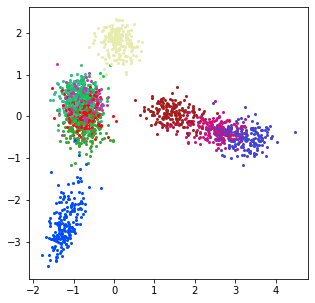

In [32]:
plt.figure(figsize = (5,5))
for i in range(N):
    plt.scatter(Z_train[i,0],Z_train[i,1],color=colors[int(y_train[i])-1],s=4)

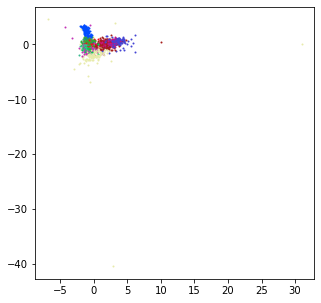

In [30]:
plt.figure(figsize = (5,5))
for i in range(N):
    plt.scatter(Z_test[i,0],-Z_test[i,1],color=colors[int(y_test[i])-1],s=1)

In [31]:
#Train data
Z_train = np.dot(x_train, largest_nine_vectors)
Z_test = np.dot(x_test, largest_nine_vectors)

train_predictions = []

for i in range(len(Z_train[:,1])):
    v = Z_train[i, :]
    initial_distances = np.zeros(Z_train.shape[0])
    for j in range(len(Z_train[:,1])):
        initial_distances[j] = spa.euclidean(v, Z_train[j, :])
    smallest_dists_indices = np.argsort(initial_distances)[:11]
    temp_labels = []
    for x in smallest_dists_indices:
        temp_labels.append(y_train[x])
    prediction= sta.mode(temp_labels)[0]
    train_predictions.append(prediction)



In [35]:
print((np.array(confusion_matrix(train_predictions, y_train))))

[[203   0   1   1   0   0  15   0   0   0]
 [  0 192   0   1   0   0   0   0   0   0]
 [  0   0 198   0   3   0  11   0   0   0]
 [  2   2   1 202   3   0   4   0   0   0]
 [  0   0   8   1 201   0   9   0   0   0]
 [  0   0   0   0   0 175   0   3   0   0]
 [  9   0   2   6  11   0 168   0   1   0]
 [  0   0   0   0   0   3   0 196   0   1]
 [  0   0   0   0   0   0   0   0 183   0]
 [  0   0   0   0   0   0   0   0   0 184]]


In [ ]:
test_predictions = []

for i in range(len(Z_test[:,1])):
    v = Z_test[i, :]
    initial_distances = np.zeros(Z_train.shape[0])
    for j in range(len(Z_train[:,1])):
        initial_distances[j] = spa.euclidean(v, Z_train[j, :])
    smallest_dists_indices = np.argsort(initial_distances)[:11]
    temp_labels = []
    for x in smallest_dists_indices:
        temp_labels.append(y_train[x])
    prediction= sta.mode(temp_labels)[0]
    test_predictions.append(prediction)
    


In [36]:
print((np.array(confusion_matrix(test_predictions, y_test))))

[[142   1  21   7   1   2  42   0   6   2]
 [  0 183   1   4   2   0   1   0   0   0]
 [  3   1 115   1  25   1  26   0   5   0]
 [ 17   3   4 167   9   7  14   0  12   4]
 [  0   0  44   8 143   5  39   0   3   1]
 [  1   1   2   0   1 118   3  18  17  12]
 [ 28   0  16  11  17   5  83   0   3   0]
 [  0   0   0   1   0  32   0 167   2  14]
 [  4   0   2   1   1   7   4   0 135   0]
 [  0   0   0   0   0  25   1  19   5 172]]
